# **Accessing and working with ICESat-2 data in the cloud**

## **1. Tutorial Overview**

### Introduction

The purpose of this notebook is to provide an introduction to the land and water data available from the NASA ICESat-2 Mission, along with an overview of data search and access options for the data. We will then provide examples in python for how to search and access the data using the `earthaccess` and `icepyx` software libraries.

### **Credits**

The notebook was created by Rachel Wegener, University of Maryland; Luis Lopez, NSIDC DAAC; and Amy Steiker, NSIDC DAAC.

### **Learning Objectives**

By the end of this demonstration you will be able to:  

1. Learn about the coverage, resolution, and structure of land and water data from the NASA ICESat-2 mission;
2. Understand the available resources at the National Snow and Ice Data Center (NSIDC), including user support documents, data access options, and data tools and services such as OpenAltimetry;
3. Use `earthaccess` and `hvplot` to search, access, and visualize ICESat-2 data within a cloud environment. 
4. Use `icepyx` to explore and subset variables within ICESat-2 land height files. 

### **Prerequisites**

See [Prerequisites](https://nasa-openscapes.github.io/2023-ssc/tutorials/prerequisites.html)

## **2. NASA's ICESat-2 Mission: Land and Water Products**

### Introduction to ICESat-2 

A quick summary of the ICESat-2 Mission and its instrument, ATLAS: Advanced Topographic Laser Altimeter System:

* Height determined using round-trip travel time of laser light (photon counting lidar)
* 10,000 laser pulses released per second, split into 3 weak/strong beam pairs at a wavelength of 532 nanometers (bright green on the visible spectrum).
* Measurements taken every 70 cm along the satellite's ground track, roughly 11 m wide footprint.

The number of photons that return to the telescope depends on surface reflectivity and cloud cover (which obscures ATLAS's view of Earth). As such, the spatial resolution of signal photons varies.

<img src="https://raw.githubusercontent.com/NASA-Openscapes/media/main/images/scc/icesat2-schematic.png" width="600px" />

### ICESat-2: Land and Water Products 

There are over 20 ICESat-2 data products, structured by processing level and surface type:

![ICESat-2 land and water products](.images/land-veg-products.png)  

Additional quick look products are available:

* Satellite observations available within 3 days, versus 30-45 days for standard products
* Supports decision-making applications: vegetation height, surface water and flooding, land surface deformation from landslides and volcanoes
* Note that geolocation and height uncertainty is greater for these products (see user guides for more info) 

[L3A Land and Vegetation Height Quick Look (ATL08QL)](https://nsidc.org/data/atl08QL/)

[L3A Along Track Inland Surface Water Data Quick Look (ATL13QL)](https://nsidc.org/data/atl13QL/)

See https://nsidc.org/data/icesat-2/products for more details.

### ATLAS/ICESat-2 L3A Land and Vegetation Height (ATL08)

https://doi.org/10.5067/ATLAS/ATL08.006 


ATL08 contains heights for both terrain and canopy in the along-track direction, plus
other descriptive parameters. 
* Data are derived from geolocated, time-tagged photon heights from the ATLAS/ICESat-2 L2A Global Geolocated Photon Data (ATL03) product.

**Spatial Resolution**
* Canopy and ground surfaces are processed in fixed 100 m data segments
* Each segment typically contain more than 100 signal photons but may contain less. 

**Temporal Resolution**
* 91-day repeat cycle along each of ATLAS/ICESat-2's 1,387 Reference Ground Tracks (RGTs)

**Uncertainty**
* Expected ranging precision for flat surfaces: Standard deviation of ~25 cm.
* Terrain height uncertainty estimates depend on ATL03, and local uncertainties within each 100 m segment

See the [ATL08 User Guide](https://nsidc.org/sites/default/files/documents/user-guide/atl08-v006-userguide.pdf) for more information. 

## **3. Overview of ICESat-2 NSIDC DAAC Data, Tools, and Resources**

### Overview of NSIDC data and resources

The NASA National Snow and Ice Data Center Distributed Active Archive Center ([NSIDC DAAC](https://nsidc.org/data/data-programs/nsidc-daac)) provides over 800 data sets covering the Earth's cryosphere and more, all of which are available to the public free of charge. These data can be used to study topics relating to snow cover, sea ice, ice sheets, ice shelves, glaciers, frozen ground, soil moisture, climate interactions, and more. Beyond providing these data, NSIDC creates tools for data access, supports data users, performs scientific research, and educates the public about the cryosphere.


#### Data Access Tools for ICESat-2 

There are many tool and access options available for ICESat-2, which can be found on each of the dataset landing pages on NSIDC's website. See the [**ATL08 Data Access & Tools**](https://nsidc.org/data/atl08/versions/6#anchor-1) section as an example. This notebook will descibe three of those options in more detail: [OpenAltimetry](https://openaltimetry.earthdatacloud.nasa.gov/data/icesat2/), [icepyx](https://icepyx.readthedocs.io/en/latest/), and [earthaccess](https://nsidc.github.io/earthaccess/). 

**Using OpenAltimetry to Visualize ICESat-2 Data**

Key functions of [OpenAltimetry](https://openaltimetry.earthdatacloud.nasa.gov/data/icesat2/) include:
* Ground track filtering and visualization
* On-the-fly plotting of segment elevations and photon clouds based date and region of interest
* Access data in CSV or subsetted HDF5 format
* Plot and analyze photon data from your area of interest using a Jupyter Notebook

Upload a shapefile of interest; view track coverage:
![](.images/oa-viz.png)  

Select a region; view elevation profile:
![](.images/oa-plot.png) 



#### Navigating ICESat-2 Tool & Access options:

This table provides an overview of the capabilities across the tools and services highlighted in this notebook:


|                                             | [`icepyx`](https://github.com/icesat2py/icepyx) | [`earthaccess`](https://github.com/nsidc/earthaccess)  | [OpenAltimetry](https://openaltimetry.earthdatacloud.nasa.gov/data/icesat2/) |
|---------------------------------------------|----------|---------------|---------------|
| Filter spatially using:                     |          |               |               |
| - Interactive map widget                    |          | soon!         | x             |
| - Bounding Box                              | x        | x             | x             |
| - Polygon                                   | x        | x             |               |
| - GeoJSON or Shapefile                      | x        | soon!         | x             |
| Filter by time and date                     | x        | x             | x             |
| Preview data                                | x        | x             | x             |
| Download data from DAAC                     | x        | x             | x             |
| Access cloud-hosted data                    | x        | x             |               |
| Subset (spatially, temporally, by variable) | x        |               | x             |
| Plot data with built-in methods             | x        |               | x             |



## **4. Search and access of ATL08 using `earthaccess`**


This notebook demonstrates searching for cloud-hosted ICESat-2 data and directly accessing Land Ice Height (ATL06) granules from an Amazon Compute Cloud (EC2) instance using the `earthaccess` package. NASA data "in the cloud" are stored in Amazon Web Services (AWS) Simple Storage Service (S3) Buckets. **Direct Access** is an efficient way to work with data stored in an S3 Bucket when you are working in the cloud. Cloud-hosted granules can be opened and loaded into memory without the need to download them first. This allows you take advantage of the scalability and power of cloud computing. 

The Amazon Global cloud is divided into geographical regions.  To have direct access to data stored in a region, our compute instance - a virtual computer that we create to perform processing operations in place of using our own desktop or laptop - must be in the same region as the data.  This is a fundamental concept of _analysis in place_. **NASA cloud-hosted data is in Amazon Region us-west2.  So your compute instance must also be in us-west2.** If we wanted to use data stored in another region, to use direct access for that data, we would start a compute instance in that region.

As an example data  collection, we use ICESat-2 Land Ice Height (ATL06) over the Juneau Icefield, AK, for March 2003. ICESat-2 data granules, including ATL06, are stored in HDF5 format. We demonstrate how to open an HDF5 granule and access data variables using `xarray`. Land Ice Heights are then plotted using `hvplot`. 

`earthaccess` is a package developed by Luis Lopez (NSIDC developer) to allow easy search of the NASA Common Metadata Repository (CMR) and download of NASA data collections.  It can be used for programmatic search and access for both _DAAC-hosted_ and _cloud-hosted_ data. It manages authenticating using Earthdata Login credentials which are then used to obtain the S3 tokens that are needed for S3 direct access. https://github.com/nsidc/earthaccess


## Import Packages

The first step in any `python` script or notebook is to import packages.  This tutorial requires the following packages:
- `earthaccess`, which enables Earthdata Login authentication and retrieves AWS credentials; enables collection and granule searches; and S3 access;
- `xarray`, used to load data;
- `ipyleaflet`, used for interactive maps in Jupyter
- `shapely`, used to work with geometric objects
- `hvplot`, used to visualize land ice height data.

We are going to import the whole `earthaccess` package.

We will also import the whole `xarray` package but use a standard short name `xr`, using the `import <package> as <short_name>` syntax.  We could use anything for a short name but `xr` is an accepted standard that most `xarray` users are familiar with.

We only need the `xarray` module from `hvplot` so we import that using the `import <package>.<module>` syntax.

Since we are going to use a developer version of earthaccess, we are going to install it directly from Github, after executing the next cell we need to restart the kernel.

In [ ]:
%%capture
%pip uninstall -y earthaccess
%pip install git+https://github.com/nsidc/earthaccess.git@explore

In [1]:
# For searching NASA data
import earthaccess
# to work with geometries
import shapely
# to load json (geojson)
import json
# interactive mapping in Python
import ipyleaflet

# For reading data, analysis and plotting
import xarray as xr
import hvplot.xarray
import hvplot.pandas
from matplotlib import pyplot as plt
import numpy as np

import pprint

## Authenticate

The first step is to get the correct authentication that will allow us to get _cloud-hosted_ ICESat-2 data.  This is all done through Earthdata Login.  The `login` method also gets the correct AWS credentials.

Login requires your Earthdata Login username and password. The `login` method will automatically search for these credentials as environment variables or in a `.netrc` file, and if those aren't available it will prompt us to enter our username and password. We use a `.netrc` strategy. A `.netrc` file is a text file located in our home directory that contains login information for remote machines.  If we don't have a `.netrc` file, `login` can create one for us.

```
earthaccess.login(persist=True)
```

In [2]:
auth = earthaccess.login()

Enter your Earthdata Login username:  earthaccess
Enter your Earthdata password:  ········


## Search for ICESat-2 Collections

`earthaccess` leverages the Common Metadata Repository (CMR) API to search for collections and granules.  [Earthdata Search](https://search.earthdata.nasa.gov/search) also uses the CMR API.

We can use the `search_datasets` method to search for ICESat-2 collections by setting `keyword='ICESat-2'`.

This will display the number of data collections (data sets) that meet this search criteria.

In [5]:
datasets = earthaccess.search_datasets(keyword = 'ICESat-2')

Datasets found: 89


In this case there are 65 collections that have the keyword ICESat-2.

The `search_datasets` method returns a python list of `DataCollection` objects. We can view the metadata for each collection in long form by passing a `DataCollection` object to print or as a summary using the `summary` method. We can also use the `pprint` function to Pretty Print each object.

We will do this for the first 10 results (objects).

In [6]:
for collection in datasets[:3]:
    pprint.pprint(collection.summary(), sort_dicts=True, indent=4)
    print('')
    

{   'concept-id': 'C2559919423-NSIDC_ECS',
    'file-type': "[{'FormatType': 'Native', 'Format': 'HDF5', "
                 "'FormatDescription': 'HTTPS'}]",
    'get-data': [   'https://n5eil01u.ecs.nsidc.org/ATLAS/ATL03.006/',
                    'https://search.earthdata.nasa.gov/search?q=ATL03+V006',
                    'http://openaltimetry.org/',
                    'https://nsidc.org/data/data-access-tool/ATL03/versions/6/'],
    'short-name': 'ATL03',
    'version': '006'}

{   'cloud-info': {   'Region': 'us-west-2',
                      'S3BucketAndObjectPrefixNames': [   'nsidc-cumulus-prod-protected/ATLAS/ATL03/006',
                                                          'nsidc-cumulus-prod-public/ATLAS/ATL03/006'],
                      'S3CredentialsAPIDocumentationURL': 'https://data.nsidc.earthdatacloud.nasa.gov/s3credentialsREADME',
                      'S3CredentialsAPIEndpoint': 'https://data.nsidc.earthdatacloud.nasa.gov/s3credentials'},
    'concept-id': 'C259

For each collection, `summary` returns a subset of fields from the collection metadata and the Unified Metadata Model (UMM):
- `concept-id` is a unique id for the collection. It consists of an alphanumeric code and the provider-id specific to the DAAC (Distributed Active Archive Center). You can use the `concept_id` to search for data granules.
- `short_name` is a quick way of referring to a collection (instead of using the full title). It can be found on the collection landing page underneath the collection title after 'DATA SET ID'. See the table below for a list of the shortnames for ICESat-2 collections.
- `version` is the version of each collection.
- `file-type` gives information about the file format of the collection granules.
- `get-data` is a collection of URLs that can be used to access the data, collection landing pages and data tools. 
- `cloud-info` this is for cloud-hosted data and provides additional information about the location of the S3 bucket that holds the data and where to get temporary AWS S3 credentials to access the S3 buckets. `earthaccess` handles these credentials and the links to the S3 buckets, so in general you won't need to worry about this information. 

For the ICESat-2 search results, within the concept-id, there is a provider-id; `NSIDC_ECS` and `NSIDC_CPRD`. `NSIDC_ECS` which is for the _on-prem_ collections and `NSIDC_CPRD` is for the _cloud-hosted_ collections. 

For ICESat-2, `ShortNames` are generally how different products are referred to.

| ShortName | Product Description |
|:-----------:|:---------------------|
| ATL03 | ATLAS/ICESat-2 L2A Global Geolocated Photon Data |
| ATL06 | ATLAS/ICESat-2 L3A Land Ice Height |
| ATL07 | ATLAS/ICESat-2 L3A Sea Ice Height |
| ATL08 | ATLAS/ICESat-2 L3A Land and Vegetation Height |
| ATL09 | ATLAS/ICESat-2 L3A Calibrated Backscatter Profiles and Atmospheric Layer Characteristics |
| ATL10 | ATLAS/ICESat-2 L3A Sea Ice Freeboard |
| ATL11 | ATLAS/ICESat-2 L3B Slope-Corrected Land Ice Height Time Series |
| ATL12 | ATLAS/ICESat-2 L3A Ocean Surface Height |
| ATL13 | ATLAS/ICESat-2 L3A Along Track Inland Surface Water Data |

### Search for cloud-hosted data
For most collections, to search for only data in the cloud, the `cloud_hosted` method can be used. 

In [7]:
cloud_hosted_datasets = earthaccess.search_datasets(
    keyword = 'ICESat-2',
    cloud_hosted = True
)

Datasets found: 40


## Search a data set using spatial and temporal filters 

We can use the `search_data` method to search for granules within a data set by location and time using spatial and temporal filters. In this example, we will search for data granules from the following datasets:

* [ATLAS/ICESat-2 L3A Land and Vegetation Height, Version 6](https://nsidc.org/data/atl08): **C2596864127-NSIDC_CPRD**
* [GEDI L4A Footprint Level Aboveground Biomass Density, Version 2.1](https://daac.ornl.gov/GEDI/guides/GEDI_L4A_AGB_Density_V2_1.html): **C2237824918-ORNL_CLOUD**
* [GEDI L2A Elevation and Height Metrics Data Global Footprint Level V002](https://lpdaac.usgs.gov/products/gedi02_av002/): **C1908348134-LPDAAC_ECS**

The temporal range is identified with standard date strings, and latitude-longitude corners of a bounding box is specified.  Polygons and points, as well as shapefiles can also be specified. This will display the number of granules that match our search. 

### Using a region of interest (ROI) 

Since NASA's Search API allows us to use polygons for our data queries, we can load a KML, geojson or shapefile and parse the geometry to filter our data. In this example we are going to use [Global Forest Watch](https://data.globalforestwatch.org/datasets/gfw::mexico-protected-areas) to download a geojson from Bosque de la Primavera, a protected reserve near Guadalajara Mexico.

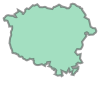

In [8]:
with open("bosque_primavera.json") as f:
    geojson = json.load(f)

geojosn_geom = geojson['features'][0]['geometry']
# polygon = shapely.geometry.box(*bbox, ccw=True)
polygon = shapely.geometry.shape(geojosn_geom)
polygon

### Simplifying geometries with shapely

Usually, geolocated boundaries contain a lot of points that are depending on the use case not as relevant when we filter data at certain resolutions, for this cases we can simplify our geometries. This also has the advantage of faster spatial queries.

In [9]:
# current geometry
len(polygon.boundary.coords)

1527

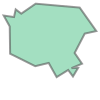

In [13]:
p = polygon.simplify(0.01, preserve_topology=True)
p

In [14]:
len(p.boundary.coords)

20

In [15]:
polygon_coords = [(coord[0], coord[1]) for coord in p.boundary.coords]

In [16]:
if "map_widget" in vars():
    if len(map_widget.roi) > 0:
        map_widget = sw.roi

params = {
    "concept_id" : ["C2613553260-NSIDC_CPRD", "C1908348134-LPDAAC_ECS", "C2237824918-ORNL_CLOUD"],
    "temporal": ("2022-08", "2023-09"),
    "polygon": polygon_coords
}

results = earthaccess.search_data(**params)

Granules found: 27


To display the rendered metadata, including the download link, granule size and two images, we will use `display`. In the example below, all 4 results are shown. 

The download link is `https` and can be used download the granule to your local machine.  This is similar to downloading _DAAC-hosted_ data but in this case the data are coming from the Earthdata Cloud.  For NASA data in the Earthdata Cloud, there is no charge to the user for egress from AWS Cloud servers.  This is not the case for other data in the cloud.


In [17]:
previews = [display(r) for r in results[0:2]]

Collection: {'EntryTitle': 'GEDI L2A Elevation and Height Metrics Data Global Footprint Level V002'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Longitude': -117.6753277878, 'Latitude': 2.230926906}, {'Longitude': -115.5121023904, 'Latitude': 5.263712182}, {'Longitude': -113.3193566915, 'Latitude': 8.3135786852}, {'Longitude': -111.0954306311, 'Latitude': 11.3388814572}, {'Longitude': -108.8140866032, 'Latitude': 14.3484778998}, {'Longitude': -106.4620431956, 'Latitude': 17.3324396211}, {'Longitude': -104.0307156793, 'Latitude': 20.2741545209}, {'Longitude': -101.4951142873, 'Latitude': 23.1745475678}, {'Longitude': -98.8345279875, 'Latitude': 26.0258428652}, {'Longitude': -96.0331084489, 'Latitude': 28.8132587886}, {'Longitude': -93.0725001179, 'Latitude': 31.5218776696}, {'Longitude': -89.9194665454, 'Latitude': 34.1481816962}, {'Longitude': -86.5529447095, 'Latitude': 36.6738117874}, {'Longitude': -82.9490953672, 'Latitude': 39.0809390149}, {'Longitude': -79.0816311418, 'Latitude': 41.3514043215}, {'Longitude': -74.9288995816, 'Latitude': 43.4635038113}, {'Longitude': -70.4725606949, 'Latitude': 45.3938196626}, {'Longitude': -65.705177563, 'Latitude': 47.1160636491}, {'Longitude': -60.6231340951, 'Latitude': 48.6056059073}, {'Longitude': -55.2506494548, 'Latitude': 49.8335750514}, {'Longitude': -49.6233034486, 'Latitude': 50.7754419675}, {'Longitude': -43.7926293655, 'Latitude': 51.4109057469}, {'Longitude': -37.8364233608, 'Latitude': 51.7234311053}, {'Longitude': -35.9424145188, 'Latitude': 51.7538835371}, {'Longitude': -35.9231336753, 'Latitude': 51.8396092661}, {'Longitude': -37.819371238, 'Latitude': 51.809423367}, {'Longitude': -43.7804190446, 'Latitude': 51.4975615732}, {'Longitude': -49.6230602586, 'Latitude': 50.8624140037}, {'Longitude': -55.2714142295, 'Latitude': 49.9187508276}, {'Longitude': -60.6527808183, 'Latitude': 48.6895862625}, {'Longitude': -65.7398957182, 'Latitude': 47.199392763}, {'Longitude': -70.5142195908, 'Latitude': 45.4751489582}, {'Longitude': -74.9753715277, 'Latitude': 43.5431466126}, {'Longitude': -79.132134268, 'Latitude': 41.4291132036}, {'Longitude': -83.0026606433, 'Latitude': 39.156738951}, {'Longitude': -86.6090388011, 'Latitude': 36.7475108482}, {'Longitude': -89.9768487679, 'Latitude': 34.220355691}, {'Longitude': -93.1310120939, 'Latitude': 31.5923766092}, {'Longitude': -96.0967765379, 'Latitude': 28.878031531}, {'Longitude': -98.8972145268, 'Latitude': 26.0902884623}, {'Longitude': -101.5548751986, 'Latitude': 23.2408075934}, {'Longitude': -104.0913816664, 'Latitude': 20.3384548532}, {'Longitude': -106.5240354945, 'Latitude': 17.393871981}, {'Longitude': -108.8729413141, 'Latitude': 14.4129096971}, {'Longitude': -111.1556435847, 'Latitude': 11.4017624409}, {'Longitude': -113.3788737616, 'Latitude': 8.3753204654}, {'Longitude': -115.5725992624, 'Latitude': 5.3253632987}, {'Longitude': -117.7121580734, 'Latitude': 2.2567629272}, {'Longitude': -117.6753277878, 'Latitude': 2.230926906}]}}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2022-08-12T13:58:30.000Z', 'EndingDateTime': '2022-08-12T15:31:20.000Z'}}
Size(MB): 2530.92
Data: ['https://e4ftl01.cr.usgs.gov//GEDI_L1_L2/GEDI/GEDI02_A.002/2022.08.12/GEDI02_A_2022224135830_O20761_02_T09273_02_003_02_V002.h5']

Collection: {'EntryTitle': 'GEDI L2A Elevation and Height Metrics Data Global Footprint Level V002'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Longitude': -173.1609344026, 'Latitude': 51.7530284041}, {'Longitude': -167.1760521233, 'Latitude': 51.6454679464}, {'Longitude': -161.2645997999, 'Latitude': 51.209882782}, {'Longitude': -155.5072484694, 'Latitude': 50.4577805213}, {'Longitude': -149.9690207929, 'Latitude': 49.4054609472}, {'Longitude': -144.7029362532, 'Latitude': 48.0766349112}, {'Longitude': -139.7513072758, 'Latitude': 46.5006528037}, {'Longitude': -135.1021277159, 'Latitude': 44.6984480695}, {'Longitude': -130.7628556492, 'Latitude': 42.6985126563}, {'Longitude': -126.7212121048, 'Latitude': 40.5263812158}, {'Longitude': -122.9535318812, 'Latitude': 38.202290072}, {'Longitude': -119.441558885, 'Latitude': 35.7497462007}, {'Longitude': -116.156280904, 'Latitude': 33.1839113585}, {'Longitude': -113.0770485646, 'Latitude': 30.5249392528}, {'Longitude': -110.1754262694, 'Latitude': 27.7824089979}, {'Longitude': -107.4296174013, 'Latitude': 24.9709566393}, {'Longitude': -104.8176959123, 'Latitude': 22.1005694166}, {'Longitude': -102.3225042087, 'Latitude': 19.1792842591}, {'Longitude': -99.9224354224, 'Latitude': 16.2199815256}, {'Longitude': -99.6723673328, 'Latitude': 15.9123705671}, {'Longitude': -99.65314585, 'Latitude': 15.9753971817}, {'Longitude': -99.8438762356, 'Latitude': 16.2628775842}, {'Longitude': -102.2432308037, 'Latitude': 19.2229411886}, {'Longitude': -104.7378051246, 'Latitude': 22.1457305979}, {'Longitude': -107.346849116, 'Latitude': 25.015127728}, {'Longitude': -110.0939437194, 'Latitude': 27.8308982302}, {'Longitude': -112.9949283564, 'Latitude': 30.5754573393}, {'Longitude': -116.0736954209, 'Latitude': 33.2366673105}, {'Longitude': -119.3587644562, 'Latitude': 35.8049962568}, {'Longitude': -122.8708691939, 'Latitude': 38.2601951272}, {'Longitude': -126.6393559801, 'Latitude': 40.5872908721}, {'Longitude': -130.6825117729, 'Latitude': 42.7625550544}, {'Longitude': -135.024237421, 'Latitude': 44.7657416995}, {'Longitude': -139.6770983822, 'Latitude': 46.5712920342}, {'Longitude': -144.6405664143, 'Latitude': 48.1519489232}, {'Longitude': -149.9045377938, 'Latitude': 49.4815205816}, {'Longitude': -155.4519338013, 'Latitude': 50.5375171735}, {'Longitude': -161.2207709753, 'Latitude': 51.2925733644}, {'Longitude': -167.1433487921, 'Latitude': 51.7302427967}, {'Longitude': -173.1397553845, 'Latitude': 51.8392481069}, {'Longitude': -173.1609344026, 'Latitude': 51.7530284041}]}}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2022-09-01T15:09:58.000Z', 'EndingDateTime': '2022-09-01T16:42:49.000Z'}}
Size(MB): 2125.53
Data: ['https://e4ftl01.cr.usgs.gov//GEDI_L1_L2/GEDI/GEDI02_A.002/2022.09.01/GEDI02_A_2022244150958_O21072_03_T00496_02_003_02_V002.h5']

## Interactive Map Widget

An upcoming feature of *earthaccess* is the map widget that will allow us to use custom maps for data selection and the exploration or results from NASA's CMR
very similar to what geopandas does with their `.explore()` method.

In [18]:
map_widget = earthaccess.search_widget()
# we add our ROI to the map
map_widget.m.add(ipyleaflet.GeoJSON(name="ROI",
        data=geojosn_geom,
        style={
          "color": "red",
          "opacity": 0.9,
          "fillOpacity": 0.1
          }
        ))
# display the map!
map_widget.explore(results)

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

## Use Direct-Access to open, load and display data stored on S3 

Direct-access to data from an S3 bucket is a two step process.  First, the files are opened using the `open` method.  The `auth` object created at the start of the notebook is used to provide Earthdata Login authentication and AWS credentials.

The next step is to load the data.  In this case, data are loaded into an `xarray.Dataset`.  Data could be read into `numpy` arrays or a `pandas.Dataframe`.  However, each granule would have to be read using a package that reads HDF5 granules such as `h5py`.  `xarray` does this all _under-the-hood_ in a single line but for a single group in the HDF5 granule*.

*ICESat-2 measures photon returns from 3 beam pairs numbered 1, 2 and 3 that each consist of a left and a right beam. In this case, we are interested in the left ground track (gt) of beam pair 1. 

Since each dataset has different variables and structure, we are going to access and plot ATL08

In [19]:
params = {
    "concept_id" : ["C2613553260-NSIDC_CPRD"],
    "temporal": ("2022-08", "2023-09"),
    "polygon": polygon_coords
}

atl08 = earthaccess.search_data(**params)

Granules found: 11


In [20]:
files = earthaccess.download(atl08[0:2], "data")
files

 Getting 2 granules, approx download size: 0.05 GB


QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]

['data/ATL08_20220826025600_09961601_006_01.h5',
 'data/ATL08_20220902144459_11101607_006_01.h5']

In [21]:
# files = earthaccess.open(atl08[0:5])
ds = xr.open_dataset(files[0], group='/gt1l/signal_photons')
ds

<xarray.Dataset>
Dimensions:          (delta_time: 121839)
Coordinates:
  * delta_time       (delta_time) datetime64[ns] 2022-08-26T03:00:39.27952320...
Data variables:
    classed_pc_flag  (delta_time) int8 ...
    classed_pc_indx  (delta_time) int32 ...
    d_flag           (delta_time) int8 ...
    ph_h             (delta_time) float32 ...
    ph_segment_id    (delta_time) int32 ...
Attributes:
    Description:  Contains parameters related to individual photons.
    data_rate:    Data are stored at the signal-photon classification rate.

`hvplot` is an interactive plotting tool that is useful for exploring data.

In [52]:



classification = np.unique(ds["classed_pc_flag"])
ds['ph_h'].hvplot.scatter(x="", y="", c=ds['classed_pc_flag'].values, cmap="tab10", s=2,)

classification

array([0, 1, 2, 3], dtype=int8)

In [57]:
labels = list(zip(classification, ["noise", "ground", "canopy", "top_of_canopy"]))
labels

[(0, 'noise'), (1, 'ground'), (2, 'canopy'), (3, 'top_of_canopy')]

In [53]:
pdf = ds.to_pandas()

In [66]:
pdf.hvplot.scatter(x="delta_time", y="ph_h", by="classed_pc_flag",  cmap="tab10", s=2, width=800)

:NdOverlay   [classed_pc_flag]
   :Scatter   [delta_time]   (ph_h)

In [67]:
ds['ph_h'].hvplot.scatter(x="delta_time", y="ph_h", c=ds['classed_pc_flag'].values,  cmap="tab10", s=2, width=800)


:Scatter   [delta_time]   (ph_h,_color)

## **3. Learning outcomes recap**

We have learned how to:
1. use `earthaccess` to search for ICESat-2 data using spatial and temporal filters and explore search results;
2. open data granules using direct access to the ICESat-2 S3 bucket;
3. load a HDF5 group into an xarray.Dataset;
4. visualize the land ice heights using hvplot.

## **4. Additional resources**

For general information about NSIDC DAAC data in the Earthdata Cloud: 

[FAQs About NSIDC DAAC's Earthdata Cloud Migration](https://nsidc.org/data/user-resources/help-center/faqs-about-nsidc-daacs-earthdata-cloud-migration)

[NASA Earthdata Cloud Data Access Guide](https://nsidc.org/data/user-resources/help-center/nasa-earthdata-cloud-data-access-guide)

Additional tutorials and How Tos:

* [NASA Earthdata Cloud Cookbook](https://nasa-openscapes.github.io/earthdata-cloud-cookbook/)
* [ICESat-2 Hackweek Noteboooks](https://icesat-2-2023.hackweek.io/intro.html)
* [Open Altimetry Portal](https://openaltimetry.earthdatacloud.nasa.gov/data/)
* [earthaccess slides](https://docs.google.com/presentation/d/1g0LU01f_Y6S-ZHnXCzRNCyL0P2w7SQsvu65rw_6ZGaw/edit?usp=sharing)